In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn import preprocessing
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_drugs = pd.read_csv("drugs.csv")
df_drugs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
df_drugs.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [4]:
# Objeto LabelEncoder y diccionario con las caracteristicas para la documentacion.
le = preprocessing.LabelEncoder()
Scaler = preprocessing.StandardScaler()

mapeoCaracteristicas= {}
mapeoCaracteristicaDrug={}

In [5]:
# Etiquetar las columnas y guardar los mapeos
for columna in ['BP', 'Sex', 'Cholesterol']:
    #Se utiliza label encoder para cambiar strings por valores numericos
    df_drugs[columna] = le.fit_transform(df_drugs[columna])
    mapeoCaracteristicas[columna] = dict(zip(le.classes_, le.transform(le.classes_)))

mapeoCaracteristicas

{'BP': {'HIGH': 0, 'LOW': 1, 'NORMAL': 2},
 'Sex': {'F': 0, 'M': 1},
 'Cholesterol': {'HIGH': 0, 'NORMAL': 1}}

In [6]:
#Creacion de variables para el entrenamiento y test.
x_ind=df_drugs.drop("Drug", axis=1)
y_dep=pd.DataFrame(df_drugs["Drug"])

In [7]:
y_dep_array = y_dep.values.ravel()
y_dep_array[:5]

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY'], dtype=object)

In [8]:
#Transformamos etiquetas en valor numerico del medicamento
y_dep_cod= pd.DataFrame(le.fit_transform(y_dep_array), columns=["Drug"])

#Guarda caracteristica en formato diccionario juntato clave-valor con zip
mapeoCaracteristicaDrug = dict(zip(le.classes_, le.transform(le.classes_)))
mapeoCaracteristicaDrug

{'drugA': 0, 'drugB': 1, 'drugC': 2, 'drugX': 3, 'drugY': 4}

In [9]:
x_ind[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [10]:
y_dep_cod.head()

,Drug
0,4
1,2
2,2
3,3
4,4


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_ind, y_dep_cod, test_size=0.3, random_state=3)

In [12]:
RandomF = RandomForestClassifier()
GradientB = GradientBoostingClassifier()
AdaB = AdaBoostClassifier()

In [13]:
models = [
    {
        'name': 'Random Forest',
        'estimator': RandomF,
        'param_grid': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    {
        'name': 'AdaBoost',
        'estimator': AdaB,
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1],
            'algorithm': ['SAMME', 'SAMME.R']
        }
    },
    {
        'name': 'Gradient Boosting',
        'estimator': GradientB,
        'param_grid': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    }
]

In [14]:
# Almacenar los mejores resultados
best_results = []

# Iterar a través de los modelos
for model in models:
    print(f"Buscando hiperparámetros óptimos para {model['name']}...")
    
    # Crear el objeto GridSearchCV
    grid_search = GridSearchCV(estimator=model['estimator'], param_grid=model['param_grid'], cv=5, scoring='accuracy', refit=True, n_jobs=-1, verbose=3, return_train_score=True)
    
    # Ajustar el modelo
    grid_search.fit(x_train, y_train)
    
    # Almacenar los mejores hiperparámetros y resultados para cada métrica
    best_results.append({
        'model': model['name'],
        'best_params': grid_search.best_params_,
        'best_accuracy': grid_search.best_score_

    })

# Mostrar los mejores resultados para cada modelo
for result in best_results:
    print(f"\nModelo: {result['model']}")
    print(f"Mejores hiperparámetros: {result['best_params']}")
    print(f"Mejor puntaje de exactitud: {result['best_accuracy']}")

Buscando hiperparámetros óptimos para Random Forest...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Buscando hiperparámetros óptimos para AdaBoost...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Buscando hiperparámetros óptimos para Gradient Boosting...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits

Modelo: Random Forest
Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mejor puntaje de exactitud: 0.9928571428571429

Modelo: AdaBoost
Mejores hiperparámetros: {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 50}
Mejor puntaje de exactitud: 0.8428571428571427

Modelo: Gradient Boosting
Mejores hiperparámetros: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Mejor puntaje de exactitud: 0.9928571428571429


AdaModelo= [
    {
        'name': 'AdaBoost',
        'estimator': AdaB,
        'param_grid': {
                'n_estimators': list(range(1, 200)),
                'learning_rate': [0.001, 0.01, 0.1, 1],
                'algorithm': ['SAMME', 'SAMME.R']
                }
    }
]


    Asegúrate de acceder al diccionario correcto en la lista AdaModelo
    for model in AdaModelo:
        print(f"Buscando hiperparámetros óptimos para {model['name']}...")
        
        # Crear el objeto GridSearchCV
        grid_search2 = GridSearchCV(estimator=model['estimator'], param_grid=model['param_grid'], cv=5, scoring='accuracy', refit='accuracy', n_jobs=-1, verbose=3, return_train_score=True)
        
        # Ajustar el modelo
        grid_search2.fit(x_train, y_train)
        
        # Obtener los mejores parámetros
        best_params = grid_search2.best_params_
        print("Mejores Hiperparámetros:", best_params)
        
        # Obtener el mejor puntaje
        best_score = grid_search2.best_score_
        print("Mejor Puntuación:", best_score)

##    Buscando hiperparámetros óptimos para AdaBoost...
    
    Fitting 5 folds for each of 1592 candidates, totalling 7960 fits
    
    Mejores Hiperparámetros: {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 39}
    
    Mejor Puntuación: 0.8428571428571427
    
    A pesar de buscar exahustivamente mejores parametros para adaboost que fue el mejor modelo en la clase anterior no encontro un mejor valor a pesar de extender un learning rate mas pequeño y con más estimadores (árboles de decision).

### Comparando los valores que nos dieron los 3 modelos, 2 de ellos tuvieron el mismo puntaje de precisión =  0.9928571428571429 (Random Forest y Gradient Boosting), entonces al utilizar cualquiera de los dos puede ser un opción. Aunque podemmos usar los dos y comparar los resultados en base al conjunto de prueba.

In [15]:
import seaborn as sns


Puntaje Random Forest: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      0.95      0.98        21
           4       0.96      1.00      0.98        22

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60

Puntaje Gradient Boosting: 

               precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      0.95      0.98        21
           4       0.92      1.00      0.96        22

    accuracy                           0.97        60
   macro avg       0.98      0.96      0.97        60
weighted avg       0

<function matplotlib.pyplot.show(close=None, block=None)>

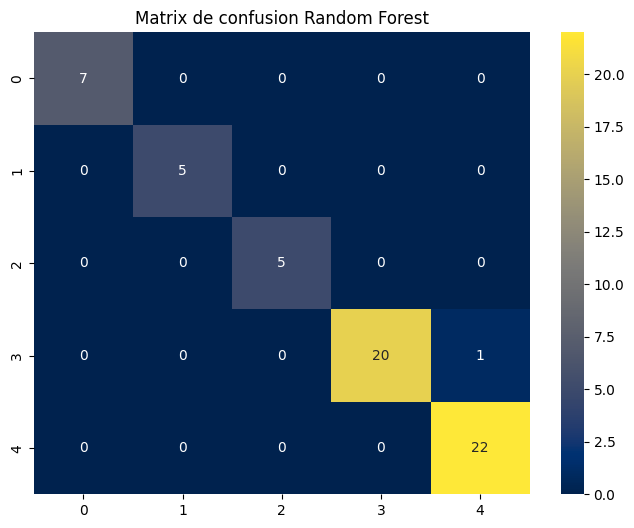

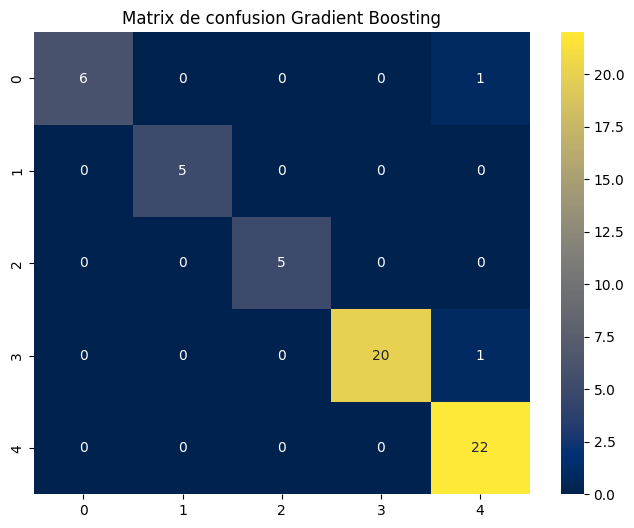

In [16]:
RandomForest_tuned=RandomForestClassifier(max_depth= None, min_samples_leaf= 2, min_samples_split= 2, n_estimators= 100)
RandomForest_tuned.fit(x_train, y_train)

GradientBoosting_tuned=GradientBoostingClassifier(learning_rate=0.01, max_depth= 3, min_samples_leaf= 2, min_samples_split= 2, n_estimators= 300)
GradientBoosting_tuned.fit(x_train, y_train)

y_predRF= RandomForest_tuned.predict(x_test)
y_predGB = GradientBoosting_tuned.predict(x_test)


print("\nPuntaje Random Forest: \n\n", classification_report(y_test, y_predRF))
cm_RF=confusion_matrix(y_test, y_predRF)

plt.figure(figsize=(8, 6))
titulo = "Matrix de confusion Random Forest"
sns.heatmap(cm_RF, annot=True, fmt='d', cmap='cividis', cbar=True)
plt.title(titulo)  # Agregar el título
plt.show

print("Puntaje Gradient Boosting: \n\n", classification_report(y_test, y_predGB),"\n")
cm_GB=confusion_matrix(y_test, y_predGB)

plt.figure(figsize=(8, 6))
titulo = "Matrix de confusion Gradient Boosting"
sns.heatmap(cm_GB, annot=True, fmt='d', cmap='cividis', cbar=True)
plt.title(titulo)  # Agregar el título
plt.show

### Se puede observar con los resultados que a pesar de que tuvieron una percision exacta igual en los parametros de entrenamiento al hacer pruebas con el conjunto de datos de prueba se obtiene que el random forest fue más preciso por predecir un valor correcto más que el gradient boosting con una precisión de .98 y gradient boosting con .97

 # Caso de prueba

In [ ]:
edad = 50
sexo = mapeoCaracteristicas['Sex']['F']
presion = mapeoCaracteristicas['BP']['HIGH']
colesterol = mapeoCaracteristicas['Cholesterol']['NORMAL']
Na_to_K = 15.302

valores_mapeados = pd.DataFrame([[edad, sexo, presion, colesterol, Na_to_K]], columns=x_train.columns)

In [ ]:
valores_mapeados

In [ ]:
inv_mapeoCaracteristicas = {k: {v: key for key, v in value.items()} for k, value in mapeoCaracteristicas.items()}
inv_mapeoCaracteristicaDrug = {v: k for k, v in mapeoCaracteristicaDrug.items()}


In [ ]:
y_pred_prueba=RandomForest_tuned.predict(valores_mapeados)
y_pred_prueba = y_pred_prueba[0]
resultado = inv_mapeoCaracteristicaDrug[y_pred_prueba]
resultado